In [ ]:
!pip install --upgrade tensorflow tensorflow-datasets


  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.37.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.N93J9U_2.0.0/patch_camelyon-test.tfrecord*...:  …

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.N93J9U_2.0.0/patch_camelyon-train.tfrecord*...: …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.N93J9U_2.0.0/patch_camelyon-validation.tfrecord*…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.
Dataset Info:
tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shap

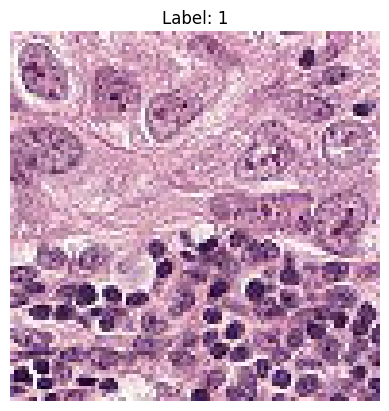

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Enable memory growth for GPUs (avoid crashes)
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PatchCamelyon dataset efficiently
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify loaded dataset
print(f"Dataset Info:\n{ds_info}")

# Example: view a sample image
import matplotlib.pyplot as plt

def show_sample(image, label):
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')

for image, label in ds_train.take(1):
    show_sample(image, label)


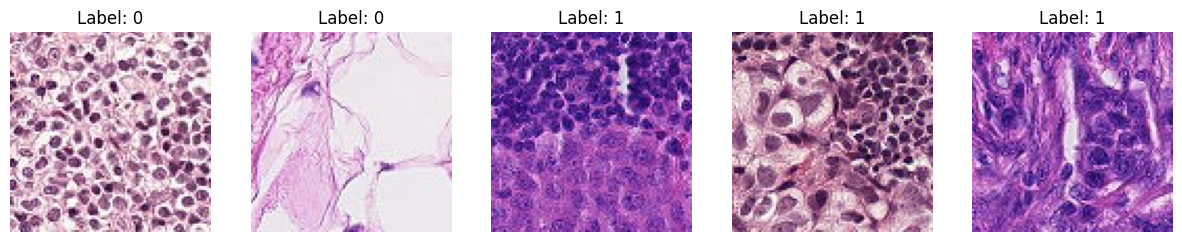

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
ds_train, ds_info = tfds.load('patch_camelyon', split='train', with_info=True, as_supervised=True)

# Display 5 sample images with labels
plt.figure(figsize=(15, 3))
for i, (image, label) in enumerate(ds_train.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.show()
